In [3]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn
%pip install warnings



  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 6.5 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 6.6 MB/s  0:00:00 eta 0:00:01
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pandas]2m3/4 [pandas]
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 8.0 MB/s  0:00:01m0:00:0100:01
Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl (273 k

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# df=pd.read_csv("/Users/prasad/ML_practice/End-End_project_ML/notebook/data/stud.csv",chunksize=100)


In [36]:
# chunks

In [37]:
# for chunk in df:
#     print(chunk.head())

In [38]:
df=pd.read_csv("/Users/prasad/ML_practice/End-End_project_ML/notebook/data/stud.csv")


In [39]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [40]:
df.shape

(1000, 8)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [42]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [43]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [44]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [46]:
print(df.duplicated().sum())

0


In [48]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [49]:
print("the categories in the gender are:",df.gender.unique())
print("the categories in the race_ethnicity are:",df.race_ethnicity.unique())
print("the categories in the parental_level_of_education are:",df.parental_level_of_education.unique())
print("the categories in the lunch are:",df.lunch.unique())
print("the categories in the test_preparation_course are:",df.test_preparation_course.unique())

the categories in the gender are: ['female' 'male']
the categories in the race_ethnicity are: ['group B' 'group C' 'group A' 'group D' 'group E']
the categories in the parental_level_of_education are: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
the categories in the lunch are: ['standard' 'free/reduced']
the categories in the test_preparation_course are: ['none' 'completed']


In [52]:
numerical_features=[column for column in df.columns if df[column].dtypes!='object']
categorical_features=[column for column in df.columns if df[column].dtypes=='object']

print(f"the length of numerical features is {len(numerical_features)} and the numerical features are {numerical_features}")
print(f"the length of categorical features is {len(categorical_features)} and the categorical features are {categorical_features}")


the length of numerical features is 3 and the numerical features are ['math_score', 'reading_score', 'writing_score']
the length of categorical features is 5 and the categorical features are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [55]:
df["total_score"]=df["math_score"]+df["reading_score"]+df["writing_score"]
df["average"]=df["total_score"]/len(numerical_features)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [62]:
reading_full=df[df["reading_score"]==100]
writing_full=df[df["writing_score"]==100]
math_full=df[df["math_score"]==100]

print("students who have full marks in reading",len(reading_full))
print("students who have full marks in writing",len(writing_full))
print("students who have full marks in math",len(math_full))


students who have full marks in reading 17
students who have full marks in writing 14
students who have full marks in math 7


In [63]:
reading_full=df[df["reading_score"]<=20]
writing_full=df[df["writing_score"]<=20]
math_full=df[df["math_score"]<=20]

print("students who have full marks in reading",len(reading_full))
print("students who have full marks in writing",len(writing_full))
print("students who have full marks in math",len(math_full))

students who have full marks in reading 1
students who have full marks in writing 3
students who have full marks in math 4


In [ ]:
# df.gender or df["gender"] both are same

0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

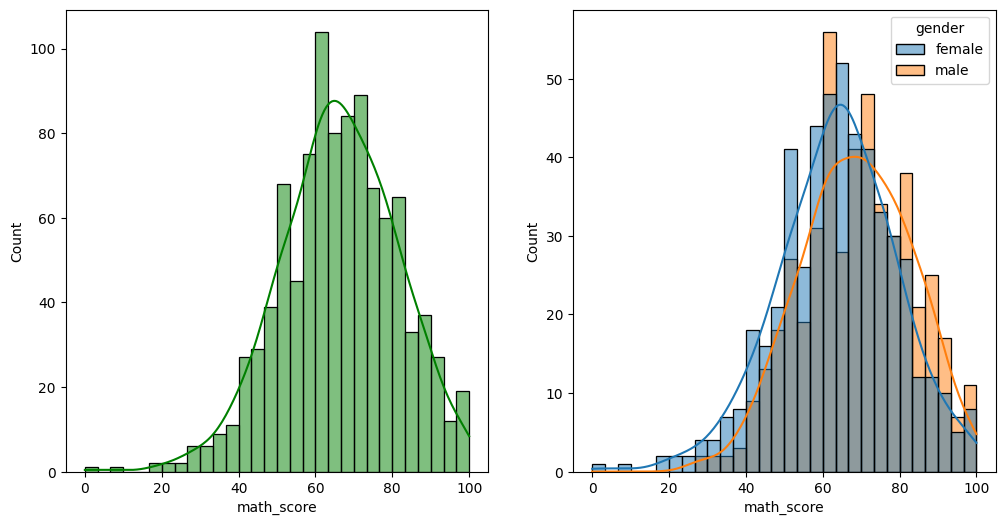

In [70]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
plt.subplot(121)
sns.histplot(data=df,x="math_score",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="math_score",bins=30,kde=True,hue="gender")
plt.show()


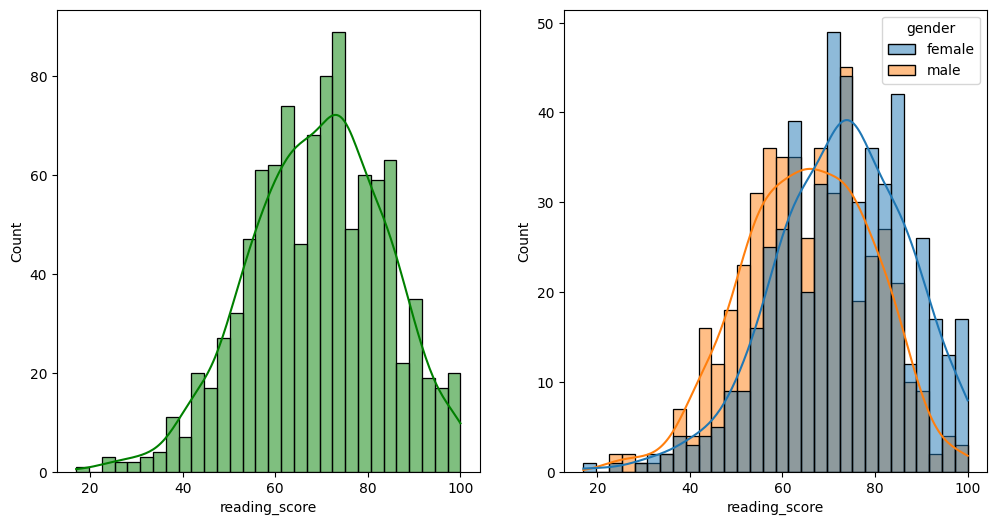

In [71]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
plt.subplot(121)
sns.histplot(data=df,x="reading_score",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="reading_score",bins=30,kde=True,hue="gender")
plt.show()

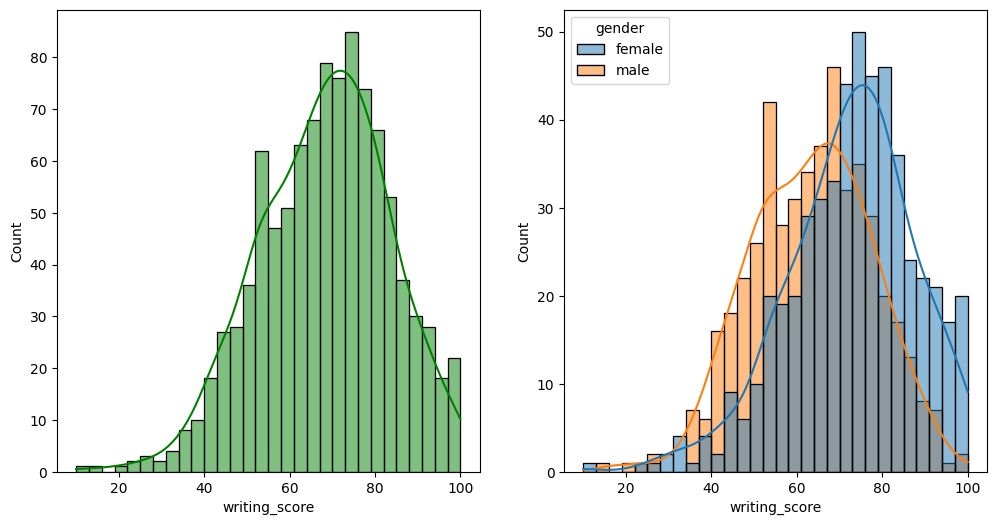

In [72]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
plt.subplot(121)
sns.histplot(data=df,x="writing_score",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="writing_score",bins=30,kde=True,hue="gender")
plt.show()

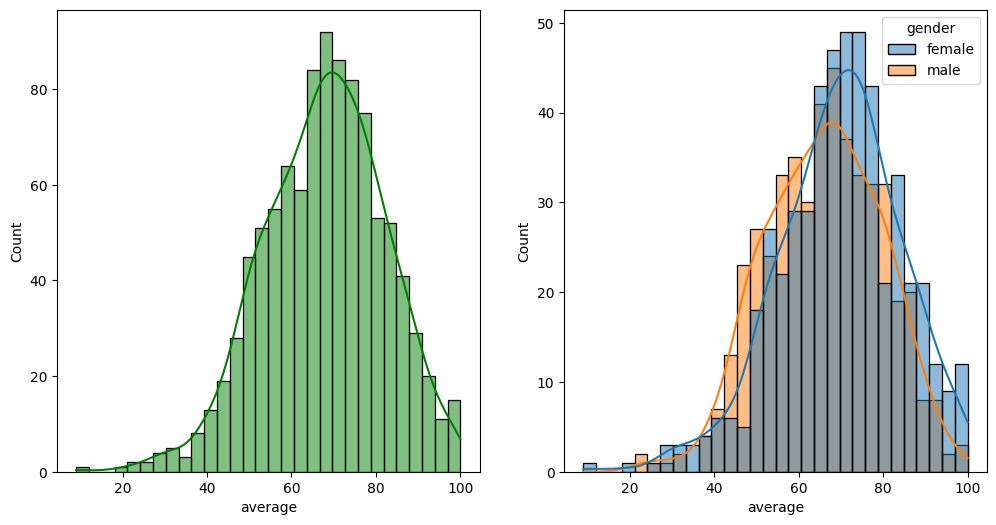

In [73]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
plt.subplot(121)
sns.histplot(data=df,x="average",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="average",bins=30,kde=True,hue="gender")
plt.show()

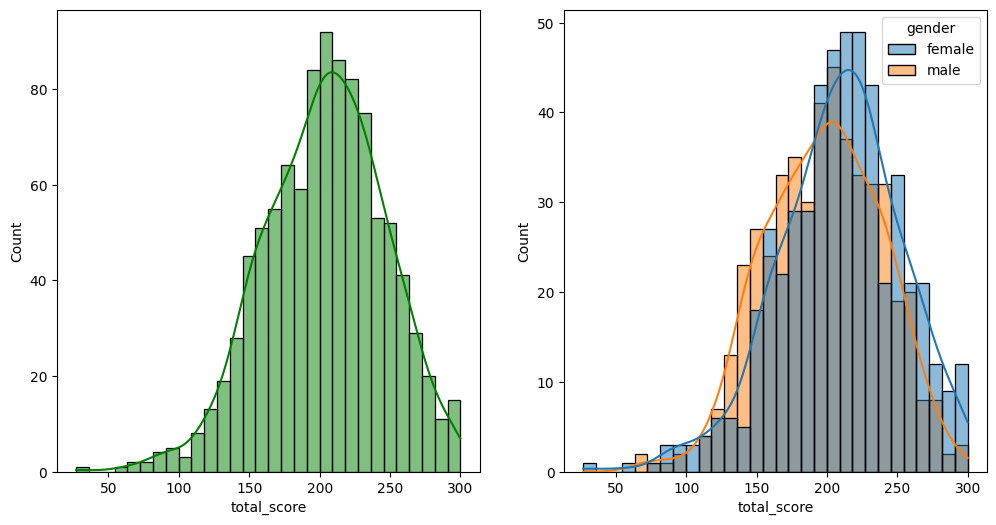

In [74]:
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
plt.subplot(121)
sns.histplot(data=df,x="total_score",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="total_score",bins=30,kde=True,hue="gender")
plt.show()

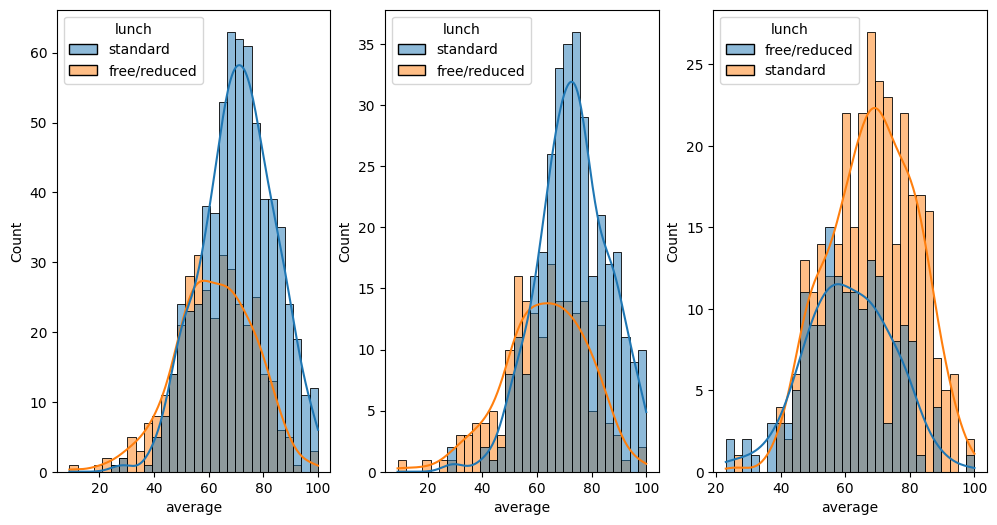

In [78]:
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(12,6))
plt.subplot(131)
sns.histplot(data=df,x="average",bins=30,kde=True,hue="lunch")
plt.subplot(132)
sns.histplot(data=df[df["gender"]=="female"],x="average",bins=30,kde=True,hue="lunch")
plt.subplot(133)
sns.histplot(data=df[df["gender"]=="male"],x="average",bins=30,kde=True,hue="lunch")
plt.show()

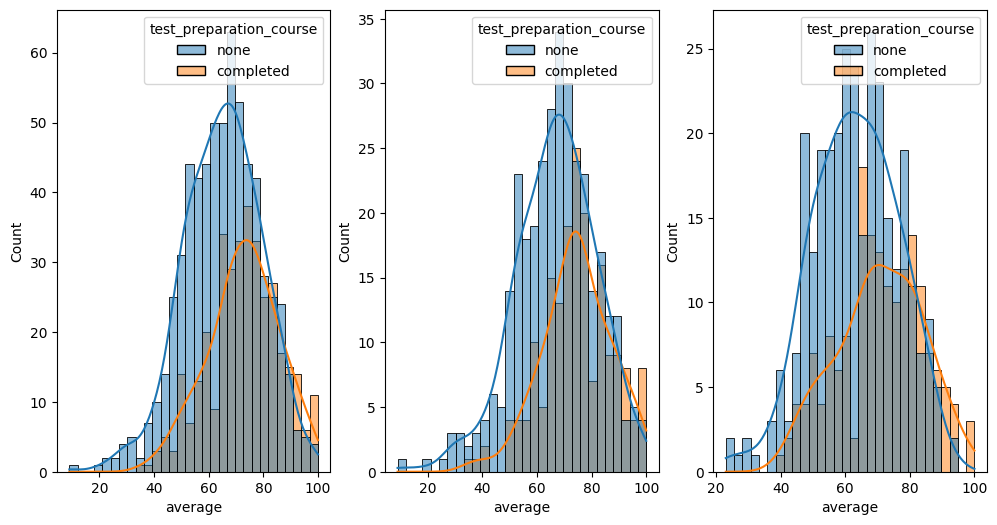

In [79]:
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(12,6))
plt.subplot(131)
sns.histplot(data=df,x="average",bins=30,kde=True,hue="test_preparation_course")
plt.subplot(132)
sns.histplot(data=df[df["gender"]=="female"],x="average",bins=30,kde=True,hue="test_preparation_course")
plt.subplot(133)
sns.histplot(data=df[df["gender"]=="male"],x="average",bins=30,kde=True,hue="test_preparation_course")
plt.show()

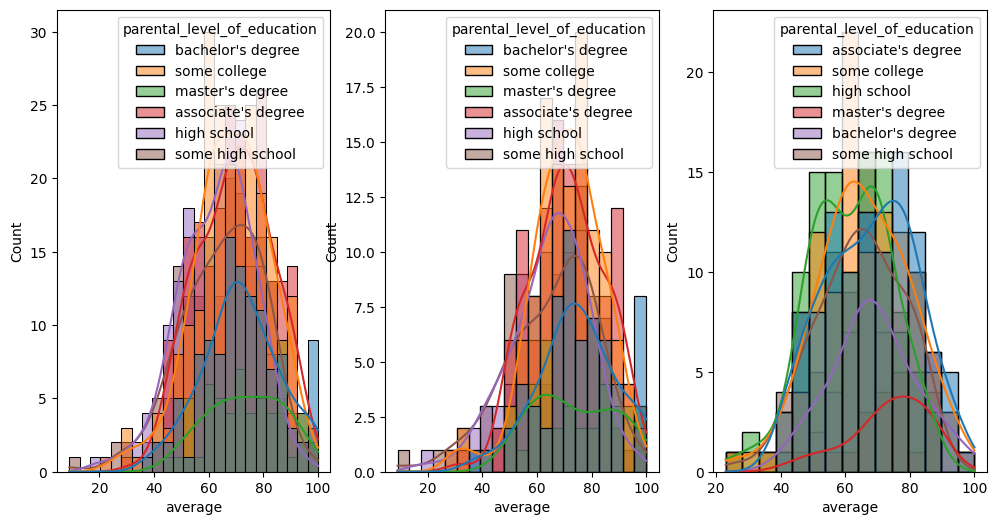

In [82]:
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(12,6))
plt.subplot(131)
sns.histplot(data=df,x="average",kde=True,hue="parental_level_of_education")
plt.subplot(132)
sns.histplot(data=df[df["gender"]=="female"],x="average",kde=True,hue="parental_level_of_education")
plt.subplot(133)
sns.histplot(data=df[df["gender"]=="male"],x="average",kde=True,hue="parental_level_of_education")
plt.show()

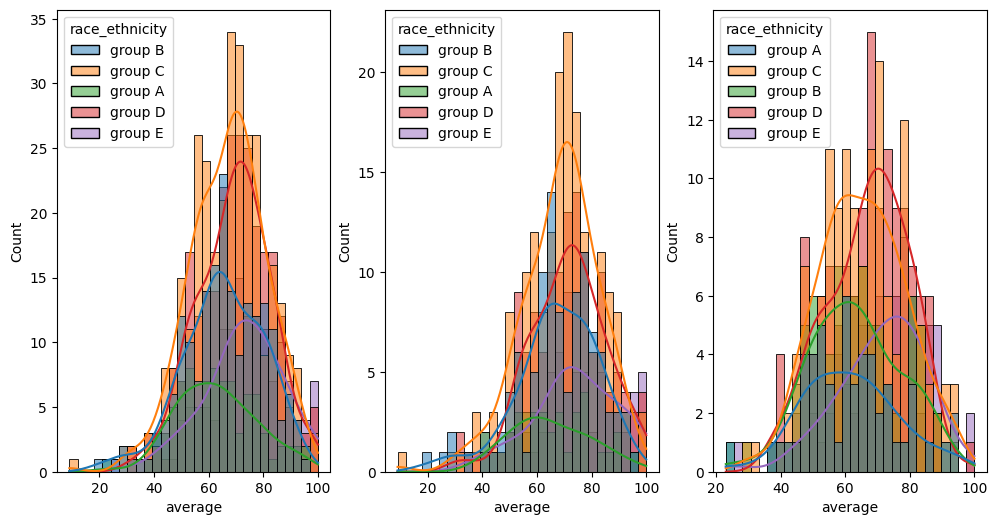

In [81]:
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(12,6))
plt.subplot(131)
sns.histplot(data=df,x="average",bins=30,kde=True,hue="race_ethnicity")
plt.subplot(132)
sns.histplot(data=df[df["gender"]=="female"],x="average",bins=30,kde=True,hue="race_ethnicity")
plt.subplot(133)
sns.histplot(data=df[df["gender"]=="male"],x="average",bins=30,kde=True,hue="race_ethnicity")
plt.show()

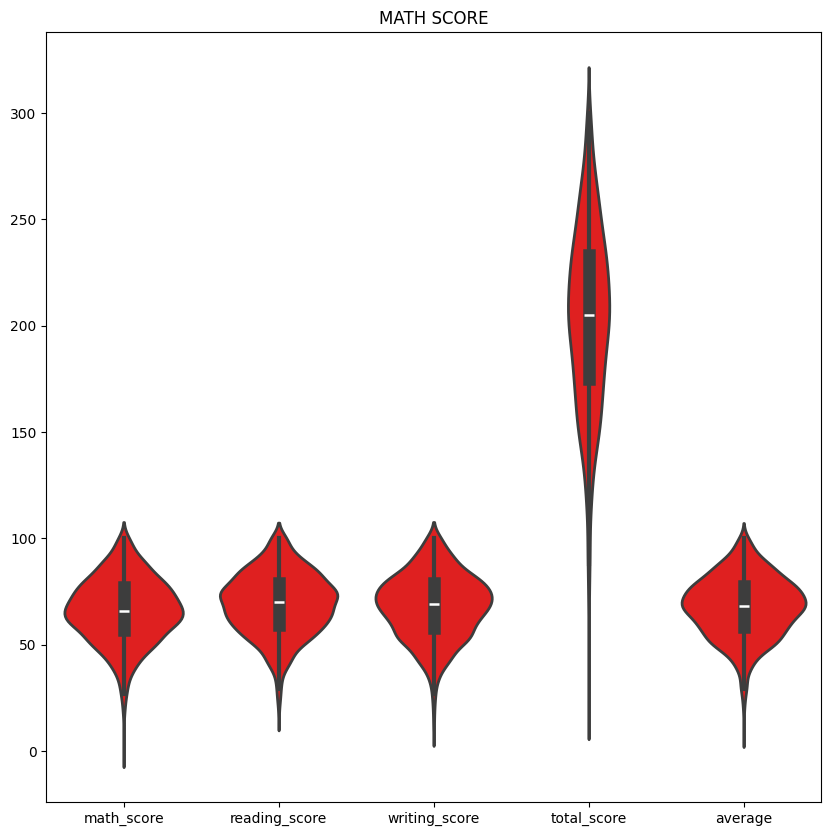

In [100]:
plt.figure(figsize=(10,10))
plt.title("MATH SCORE")
sns.violinplot(data=df,color="red", linewidth=2)
plt.show()

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

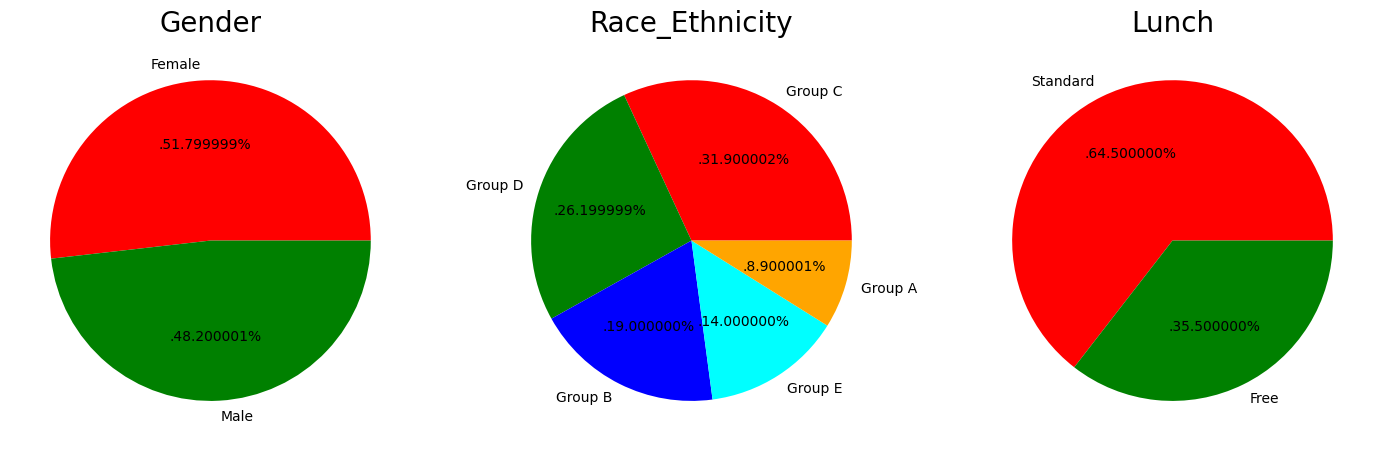

In [93]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')



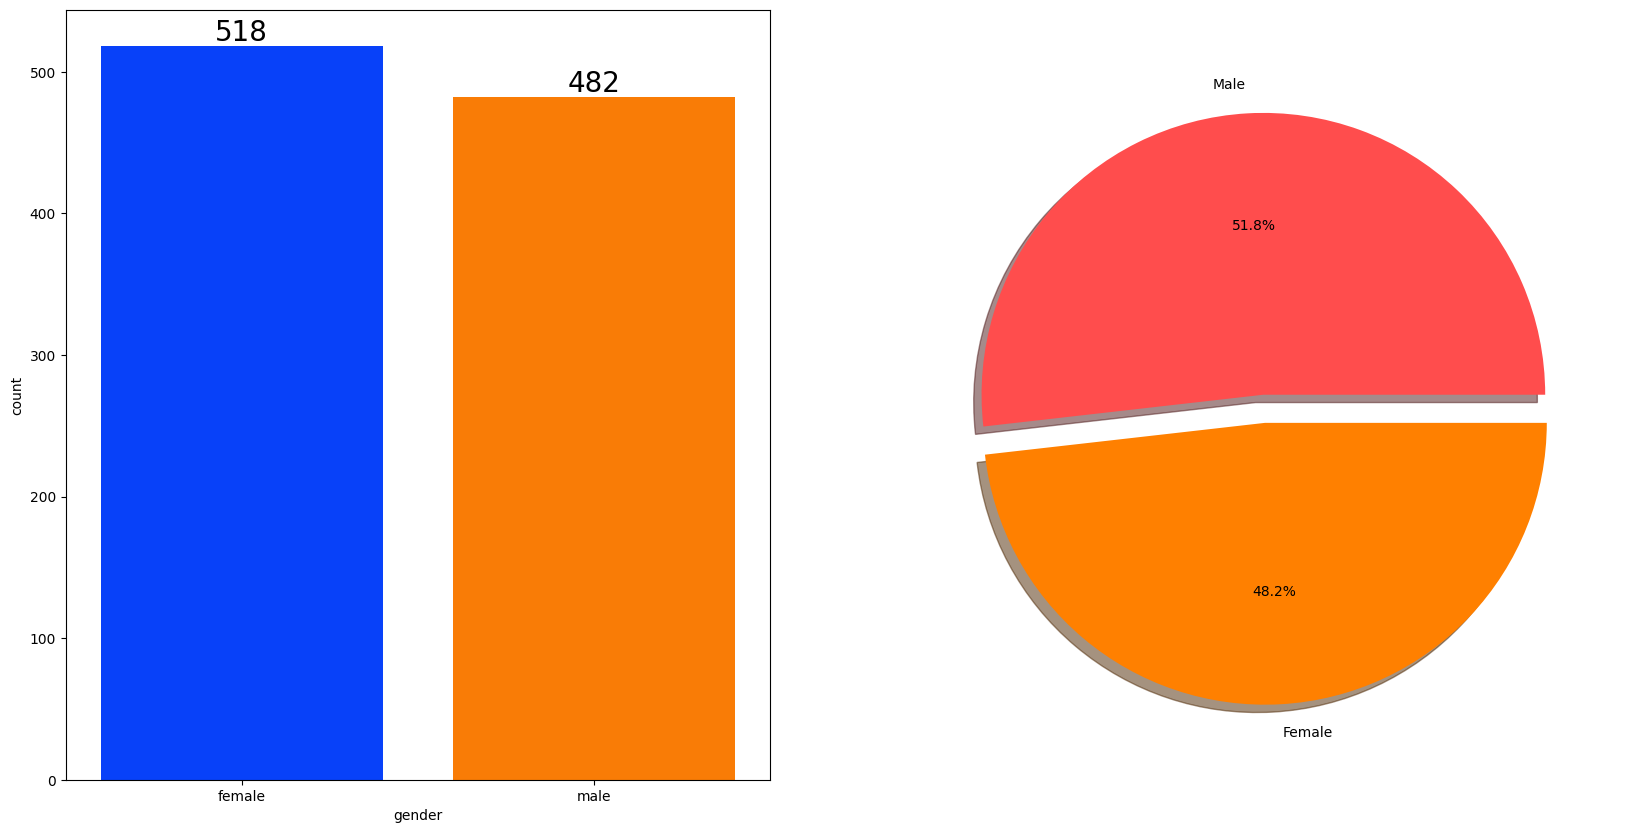

In [108]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

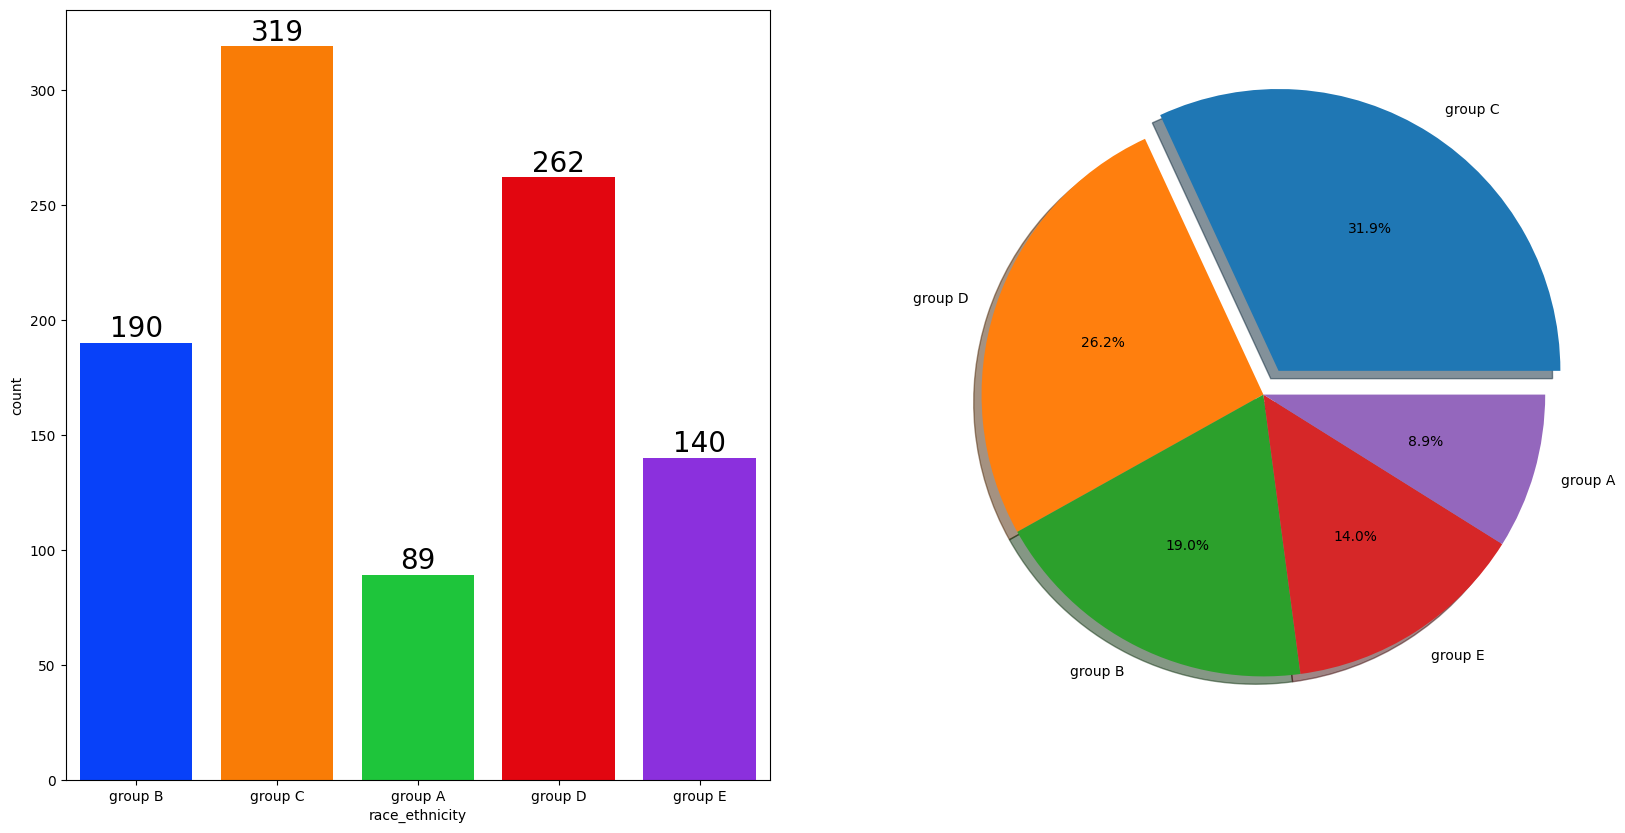

In [110]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

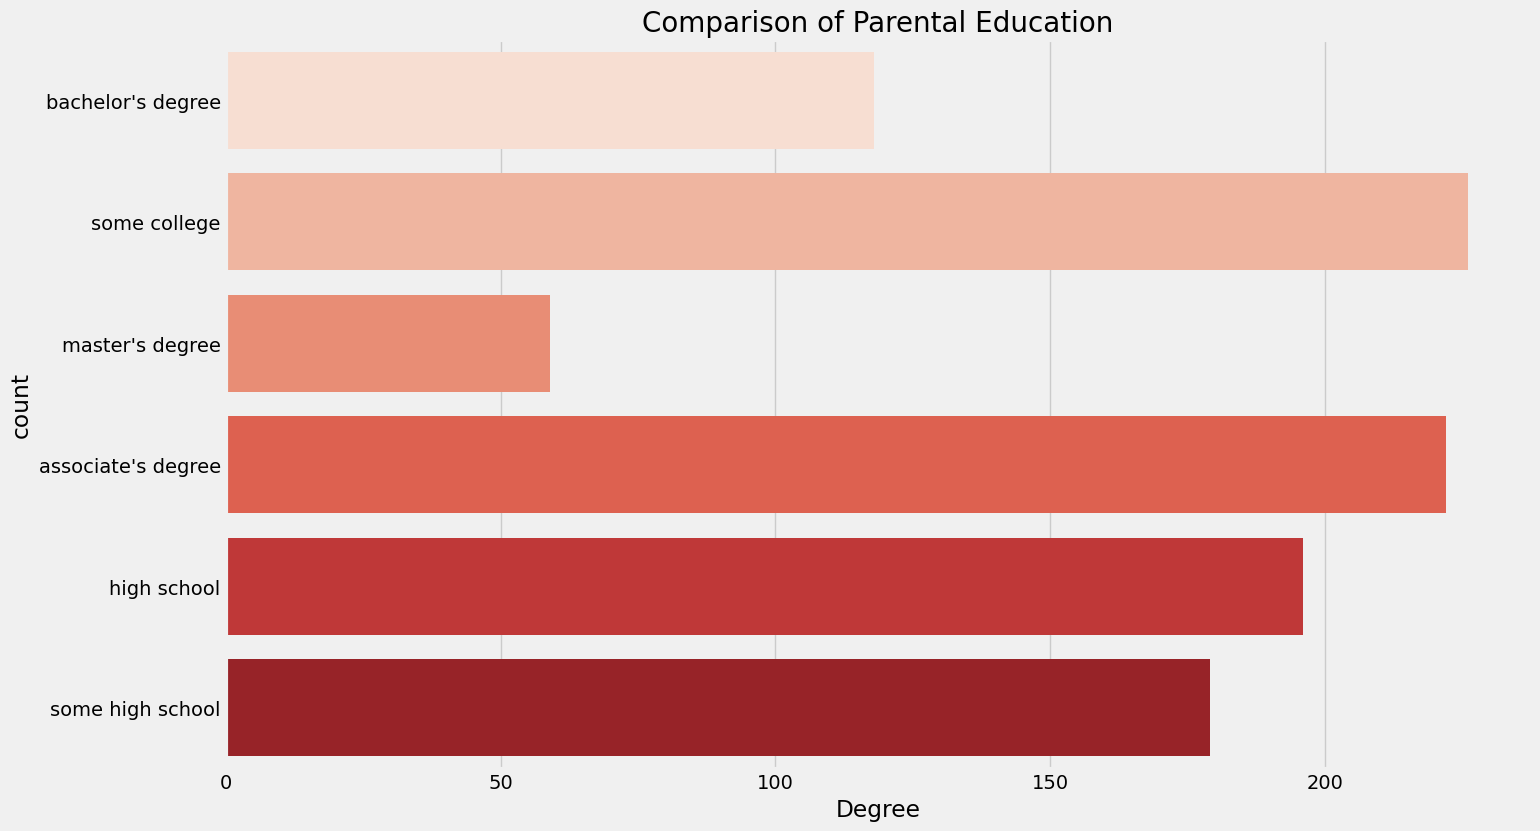

In [122]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = "Reds")
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

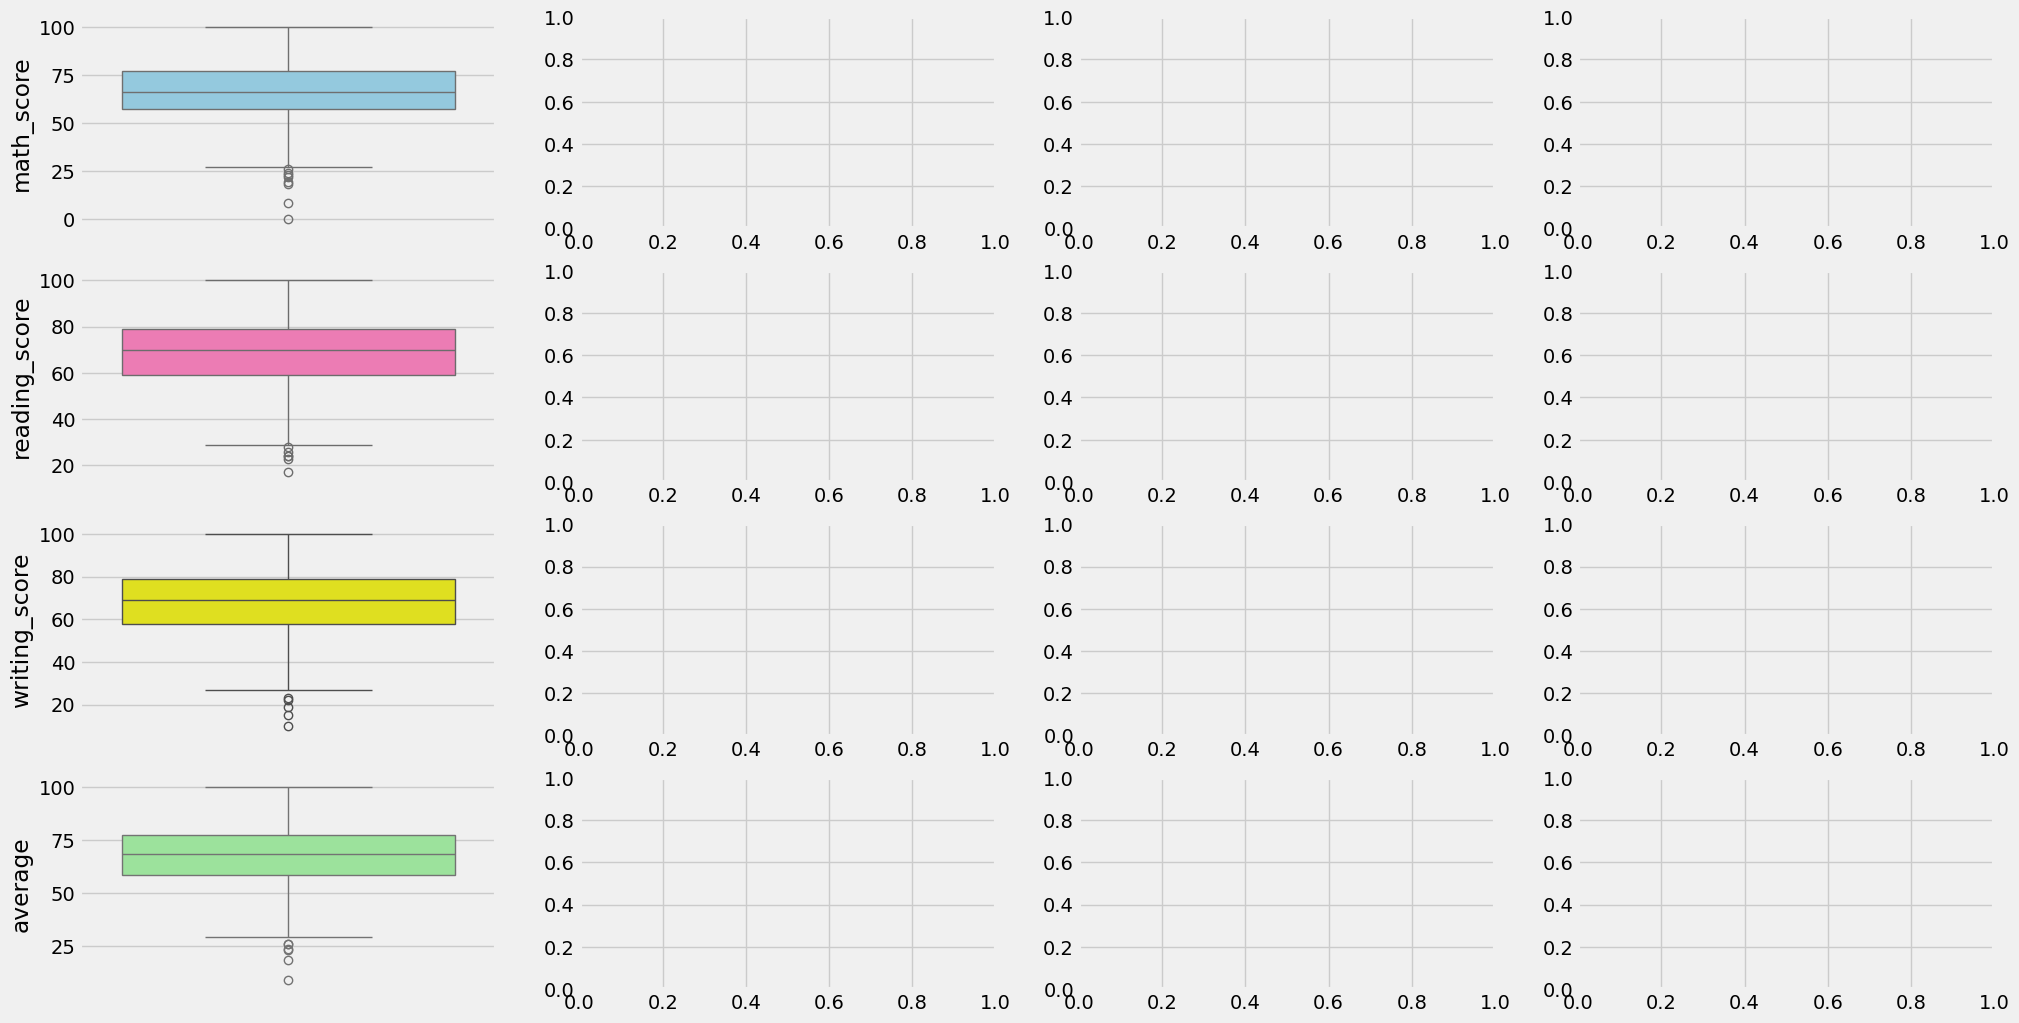

In [147]:
plt.subplots(nrows=4,ncols=4,figsize=(22,12))
plt.subplot(4,4,1)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(4,4,5)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(4,4,9)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(4,4,13)
sns.boxplot(df['average'],color='lightgreen')
plt.show()